Analysis and Visualization of WikiSRAT data
===

In this notebook, we create interactive visualizations of data in the WikiSRAT database.

Run within a conda environment specified in the included `environment.yml` file. 

Create the environment with either the Import button on Anaconda Navigator's Environments tab, or this Conda command in your terminal or console, replacing `path/environment.yml` with the full file pathway to the environment.yml file in the local cloned repository.

```bash
conda env create --file path/environment.yml
```

To update your environment, either use Anaconda Navigator, or run the following command:

```bash
conda env update --file path/environment.yml --prune
```

or

```bash
conda env create --file path/environment.yml --force
```

# Setup
* Import packages
* Load data from parquet files

In [ ]:
# packages for data requests
import requests
import pandas as pd
from requests.auth import HTTPBasicAuth
import json
import os
import psycopg2

from pathlib import Path

# packages for viz 
import matplotlib
import matplotlib.pyplot as plt
# from pynhd import NLDI, WaterData, NHDPlusHR
# import pynhd as nhd
# import spatialpandas as spd
# import spatialpandas.io
# import pygeos
import geopandas as gpd
import plotly.express as px
import holoviews as hv
import datashader as ds
# import geoviews as gv
# import geoviews.feature as gf
# from geoviews import opts
# from cartopy import crs 
# import geoviews.tile_sources as gts
# gv.extension('bokeh', 'matplotlib')
# import hvplot.pandas


In [5]:
# print("Geopandas: ", gpd.__version__)
# print("spatialpandas: ", spd.__version__)
# print("datashader: ", ds.__version__)
# print("pygeos: ", pygeos.__version__)

In [6]:
# Find current working directory
Path.cwd()

WindowsPath('C:/Users/sjordan/Documents/GitHub/WikiSRATMicroService')

In [ ]:
# username = "Sarah"
# username = "Anthony"

In [ ]:
# Set alternate project & data folders
# if username == "Anthony":
    # project_folder = Path('/Users/aaufdenkampe/Documents/Python/WikiSRATMicroService')
# elif username == "Sarah":
    # project_folder = Path('C:/Users/sjordan/Documents/Python/WikiSRATMicroService')
    

# just use relative path - will work for anybody in this directory / cloning the github
data_folder    = Path('data/')

## Read Parquet File

In [ ]:
%%time
# read data from parquet files
base_gdf = gpd.read_parquet(data_folder /'base_df.parquet')
rest_gdf = gpd.read_parquet(data_folder /'rest_df.parquet')

In [6]:
base_gdf.head()

tploadrate_total  tploadate_conc  tnloadrate_total  tnloadate_conc  \
comid                                                                         
4149942           19.8106          0.0199          461.7835          0.4635   
4151440            0.0037          0.0120            0.0679          0.2181   
4150082            2.0144          0.0099           25.4212          0.1405   
4151394            2.9297      -9999.0000           58.2131      -9999.0000   
4149944            0.2212          0.0199            1.7217          0.4623   

         tssloadrate_total  tssloadate_conc  catchment_hectares  \
comid                                                             
4149942         23315.2162          23.4000            199.4606   
4151440             6.6330          12.7636              0.0899   
4150082          4910.5669          22.9938             45.1439   
4151394          5942.7803       -9999.0000             11.8705   
4149944           714.6338          23.9081              1.3489   

         watershed_hectares  tploadrate_total_ws  tnloadrate_total_ws  \
comid                                                                   
4149942              199.62               0.0993               2.3135   
4151440             5049.90               0.0758               1.3784   
4150082               69.21               0.0490               0.6948   
4151394           697436.01          -54432.3165          -54432.3165   
4149944              200.97               0.0993               2.3064   

         tssloadrate_total_ws   maflowv  \
comid                                     
4149942              116.7978     1.115   
4151440               80.6635    35.714   
4150082              113.7074     0.383   
4151394           -54432.3165  4248.704   
4149944              119.2765     1.122   

                                                      geom  \
comid                                                        
4149942  MULTILINESTRING Z ((506490.373 4594278.694 0.0...   
4151440  MULTILINESTRING Z ((514920.168 4587490.302 0.0...   
4150082  MULTILINESTRING Z ((502865.583 4590886.516 0.0...   
4151394  MULTILINESTRING Z ((507356.841 4591522.967 0.0...   
4149944  MULTILINESTRING Z ((506039.307 4593540.381 0.0...   

                                            geom_catchment  \
comid                                                        
4149942  MULTIPOLYGON (((506092.122 4593422.061, 506098...   
4151440  MULTIPOLYGON (((514955.572 4587467.785, 514926...   
4150082  MULTIPOLYGON (((502581.690 4590660.525, 502522...   
4151394  MULTIPOLYGON (((507205.238 4591376.554, 507218...   
4149944  MULTIPOLYGON (((506092.122 4593422.061, 505974...   

                        cluster fa_name  sub_focusarea     nord  nordstop  \
comid                                                                       
4149942  Poconos and Kittatinny    None            NaN  72392.0   72392.0   
4151440  Poconos and Kittatinny    None            NaN  72128.0   72165.0   
4150082  Poconos and Kittatinny    None            NaN  72440.0   72441.0   
4151394  Poconos and Kittatinny    None            NaN  72338.0   74971.0   
4149944  Poconos and Kittatinny    None            NaN  72391.0   72392.0   

                huc12  
comid                  
4149942  020401040504  
4151440  020401040504  
4150082  020401040504  
4151394  020401040504  
4149944  020401040504

In [7]:
# define catchments as the geometry used by GeoPandas
base_gdf_catch = gpd.GeoDataFrame(base_gdf, geometry="geom_catchment")
rest_gdf_catch = gpd.GeoDataFrame(rest_gdf, geometry="geom_catchment")

In [8]:
rest_gdf_catch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19496 entries, 2612952 to 8409235
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tploadrate_total      19496 non-null  float64 
 1   tploadate_conc        19496 non-null  float64 
 2   tnloadrate_total      19496 non-null  float64 
 3   tnloadate_conc        19496 non-null  float64 
 4   tssloadrate_total     19496 non-null  float64 
 5   tssloadate_conc       19496 non-null  float64 
 6   catchment_hectares    19496 non-null  float64 
 7   watershed_hectares    19496 non-null  float64 
 8   tploadrate_total_ws   19496 non-null  float64 
 9   tnloadrate_total_ws   19496 non-null  float64 
 10  tssloadrate_total_ws  19496 non-null  float64 
 11  maflowv               19496 non-null  float64 
 12  geom                  19266 non-null  geometry
 13  geom_catchment        19496 non-null  geometry
 14  cluster               17358 non-null  

In [9]:
rest_gdf_catch.index

Int64Index([ 2612952,  2612782,  2612920,  2613460,  2612780,  2612792,
             2612956,  2612794,  2612948,  2612950,
            ...
             9437009, 26814149,  9437007,  9437021,  9436995,  9437027,
             9437011,  9436999,  8409259,  8409235],
           dtype='int64', name='comid', length=19496)

In [10]:
# Example selecting by comid, which is the row index
base_gdf.loc[4648450]

tploadrate_total                                                 375.8633
tploadate_conc                                                     0.2979
tnloadrate_total                                                5789.5674
tnloadate_conc                                                     4.5884
tssloadrate_total                                             205160.7942
tssloadate_conc                                                  162.5966
catchment_hectares                                               263.4373
watershed_hectares                                                 263.61
tploadrate_total_ws                                                1.4259
tnloadrate_total_ws                                               21.9625
tssloadrate_total_ws                                             778.2738
maflowv                                                             1.412
geom                    (LINESTRING Z (422951.8280493749 4441126.60863...
geom_catchment          (POLYGON ((423

In [11]:
base_gdf.loc[4648450].tploadrate_total / base_gdf.loc[4648450].catchment_hectares 

1.4267656858007578

In [12]:
rest_gdf.loc[4648450]

tploadrate_total                                                 375.8633
tploadate_conc                                                     0.2979
tnloadrate_total                                                5789.5674
tnloadate_conc                                                     4.5884
tssloadrate_total                                             205160.7942
tssloadate_conc                                                  162.5966
catchment_hectares                                               263.4373
watershed_hectares                                                 263.61
tploadrate_total_ws                                                1.4259
tnloadrate_total_ws                                               21.9625
tssloadrate_total_ws                                             778.2738
maflowv                                                             1.412
geom                    (LINESTRING Z (422951.8280493749 4441126.60863...
geom_catchment          (POLYGON ((423

In [13]:
base_gdf.tploadrate_total.min()

0.0003

In [14]:
base_gdf.tploadrate_total.max()

266503.8003

# Static Plots 

Plot with GeoPandas

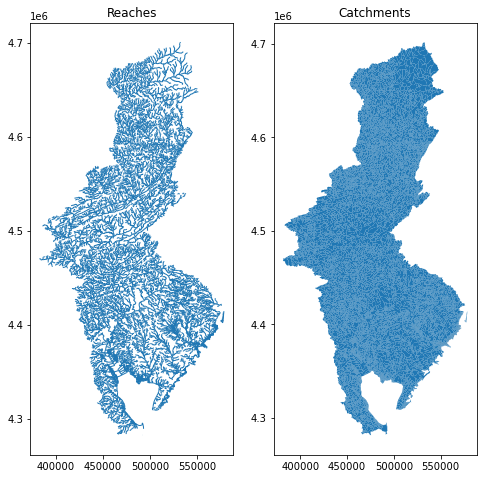

Wall time: 5.75 s


In [15]:
%%time
fig, (ax1, ax2) = plt.subplots(1,2)
base_gdf.plot(lw=1, ax=ax1)
base_gdf_catch.plot(lw=0.1, ax=ax2)
fig.set_size_inches(8,8)
ax1.set_title("Reaches")
ax2.set_title("Catchments")
plt.show()

## Plot by Reach & Catchment Values

Adding a log colorbar (or normalizing the colorscale in any way): https://matplotlib.org/stable/tutorials/colors/colormapnorms.html

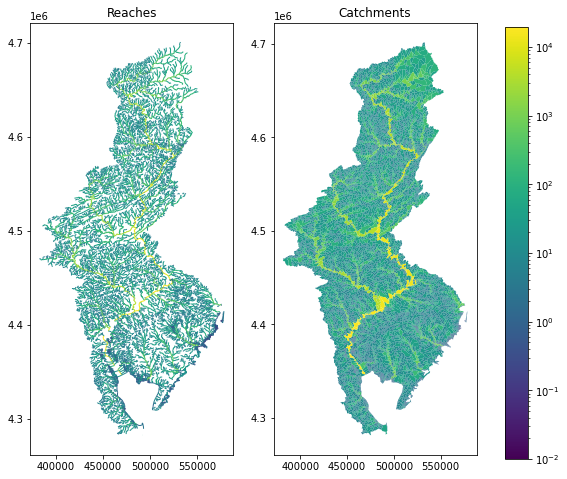

Wall time: 6.07 s


In [16]:
%%time
# Plot colors by values of Mean Annual Flow Volumentric (`maflowv`)
fig, (ax1, ax2) = plt.subplots(1,2)
# ax3 = fig.add_axes([0.85, 0.1, 0.1, 0.8])


r = base_gdf.plot(column = 'maflowv',lw=1, ax=ax1, norm=matplotlib.colors.LogNorm()) 
c = base_gdf_catch.plot(column = 'maflowv', lw=0.1, ax=ax2, norm=matplotlib.colors.LogNorm())
fig.set_size_inches(8,8)
ax1.set_title("Reaches")
ax2.set_title("Catchments")

# add colorbar 
cax = fig.add_axes([0.95, 0.12, 0.04, 0.75])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.LogNorm(vmin=base_gdf_catch.maflowv.min() + 0.01, vmax=base_gdf_catch.maflowv.max()))
cbr = fig.colorbar(sm, cax=cax,)

# plt.colorbar(c, ax = ax3)
plt.show()

In [17]:
base_gdf_catch.tploadate_conc.min()

-9999.0

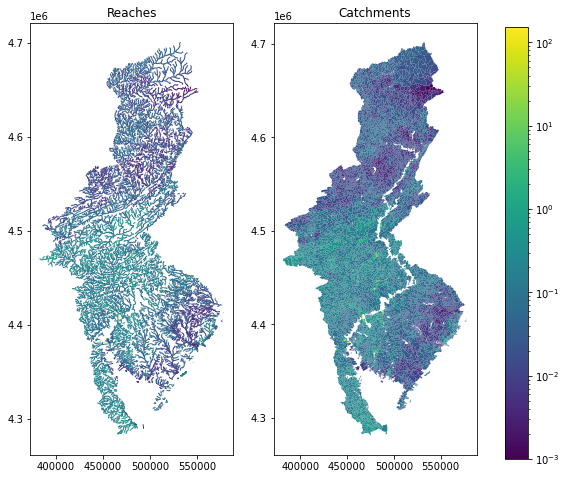

Wall time: 5.87 s


In [18]:
%%time
# Plot colors by values of Total Phosphorus concentrations & Load Rates
fig, (ax1, ax2) = plt.subplots(1,2)
base_gdf.plot(column = 'tploadate_conc', lw=1, ax=ax1, norm=matplotlib.colors.LogNorm())
base_gdf_catch.plot(column = 'tploadate_conc', lw=0.1, ax=ax2, norm=matplotlib.colors.LogNorm())
fig.set_size_inches(8,8)
ax1.set_title("Reaches")
ax2.set_title("Catchments")

# add colorbar 
cax = fig.add_axes([0.95, 0.12, 0.04, 0.75])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.LogNorm(vmin=base_gdf_catch[base_gdf_catch.tploadate_conc > 0].tploadate_conc.min(), vmax=base_gdf_catch.tploadate_conc.max()))
cbr = fig.colorbar(sm, cax=cax,)

plt.show()

## Plot by Cluster and Focus Area

Notes from Mike & Lin:
- DRWI projects have only been implemented in Focus Areas
- `fa_name` has changed over time
  - We're using Phase 2+ name
- We should present info at the smallest scale
  - Show "Paulins Kill" Focus Area, where all the projects are in and the FA is "saturatated" with projects 
- Pour Points = `cluster.fa_name.sub_focusarea` 

In [19]:
base_gdf_catch.cluster.unique()

array(['Poconos and Kittatinny', 'drb', 'Kirkwood - Cohansey Aquifer',
       'New Jersey Highlands', 'Upper Lehigh', 'Schuylkill Highlands',
       'Upstream Suburban Philadelphia', 'Middle Schuylkill',
       'Brandywine and Christina', None], dtype=object)

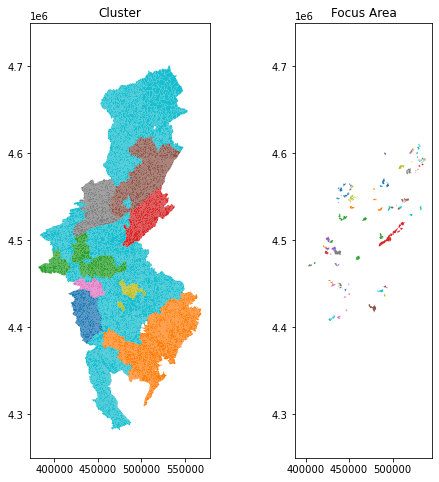

In [20]:
# color by cluster 
fig, (ax1, ax2) = plt.subplots(1,2)
base_gdf_catch[base_gdf_catch.cluster != 'None'].plot(column = 'cluster', lw=0.1, ax=ax1)
base_gdf_catch[base_gdf_catch.cluster != 'None'].plot(column = 'fa_name', lw=0.1, ax=ax2)

fig.set_size_inches(8,8)
ax1.set_title("Cluster")
ax2.set_title("Focus Area")
for ax in [ax1, ax2]:
    ax.set_ylim(4.25 * 10**6, 4.75 * 10**6)
plt.show()

# Dynamic Plots

## px.chloropleth_mapbox

Un-comment out cells below to commit -- otherwise, the files are too large.

https://stackoverflow.com/questions/46891914/control-mapbox-extent-in-plotly-python-api

Remove borders: https://stackoverflow.com/questions/61420022/plotly-choropleth-without-borders

In [26]:
# project for plotly
base_gdf_proj = base_gdf.to_crs(epsg=4326)
base_gdf_catch_proj = base_gdf_catch.to_crs(epsg=4326)

In [22]:
base_gdf_proj

tploadrate_total  tploadate_conc  tnloadrate_total  tnloadate_conc  \
comid                                                                         
4149942           19.8106          0.0199          461.7835          0.4635   
4151440            0.0037          0.0120            0.0679          0.2181   
4150082            2.0144          0.0099           25.4212          0.1405   
4151394            2.9297      -9999.0000           58.2131      -9999.0000   
4149944            0.2212          0.0199            1.7217          0.4623   
...                   ...             ...               ...             ...   
4150260            1.2717          0.0147           17.4586          0.3105   
4151474            0.0276          0.0154            0.6812          0.2186   
4150526           18.9184          0.0145          479.5846          0.3683   
4151464           44.8557      -9999.0000          787.3101      -9999.0000   
4150466            0.7414      -9999.0000            7.8082      -9999.0000   

         tssloadrate_total  tssloadate_conc  catchment_hectares  \
comid                                                             
4149942         23315.2162          23.4000            199.4606   
4151440             6.6330          12.7636              0.0899   
4150082          4910.5669          22.9938             45.1439   
4151394          5942.7803       -9999.0000             11.8705   
4149944           714.6338          23.9081              1.3489   
...                    ...              ...                 ...   
4150260          3213.5741          24.8598             10.1619   
4151474            42.7999          33.5127              0.6295   
4150526         23384.0050          17.9602            213.8491   
4151464         94131.3778       -9999.0000            522.5731   
4150466          2075.1706       -9999.0000             10.5216   

         watershed_hectares  tploadrate_total_ws  tnloadrate_total_ws  \
comid                                                                   
4149942              199.62               0.0993               2.3135   
4151440             5049.90               0.0758               1.3784   
4150082               69.21               0.0490               0.6948   
4151394           697436.01          -54432.3165          -54432.3165   
4149944              200.97               0.0993               2.3064   
...                     ...                  ...                  ...   
4150260              488.88               0.0878               1.8542   
4151474             2902.50               0.1018               1.4445   
4150526              214.02               0.0882               2.2406   
4151464           723788.37          -54568.0665          -54568.0665   
4150466              571.86           -1093.7373           -1093.7373   

         tssloadrate_total_ws   maflowv  \
comid                                     
4149942              116.7978     1.115   
4151440               80.6635    35.714   
4150082              113.7074     0.383   
4151394           -54432.3165  4248.704   
4149944              119.2765     1.122   
...                       ...       ...   
4150260              148.4542     3.267   
4151474              221.4500    21.463   
4150526              109.2608     1.457   
4151464           -54568.0665  4420.236   
4150466            -1093.7373     0.070   

                                                      geom  \
comid                                                        
4149942  MULTILINESTRING Z ((-74.92224 41.50010 0.00000...   
4151440  MULTILINESTRING Z ((-74.82140 41.43885 0.00000...   
4150082  MULTILINESTRING Z ((-74.96568 41.46957 0.00000...   
4151394  MULTILINESTRING Z ((-74.91189 41.47527 0.00000...   
4149944  MULTILINESTRING Z ((-74.92765 41.49346 0.00000...   
...                                                    ...   
4150260  MULTILINESTRING Z ((-74.85752 41.44570 0.00000...   
4151474  MULTILINESTRING Z ((-74.88831 41

In [23]:
base_gdf_proj.index

Int64Index([  4149942,   4151440,   4150082,   4151394,   4149944,   4150436,
              4150464,   4151392,   4150226,   4150518,
            ...
            932040262,   4150192,   2619260,   4188139,   4151472,   4150260,
              4151474,   4150526,   4151464,   4150466],
           dtype='int64', name='comid', length=19496)

In [ ]:
# %%time
fig = px.choropleth_mapbox(base_gdf_catch_proj,
                           geojson=base_gdf_catch_proj.geom_catchment,
                           locations=base_gdf_catch_proj.index,
                           color='maflowv',
                           color_continuous_scale="Viridis",
                           # range_color=(0, 12),
                           # width=200,
                           mapbox_style="carto-positron",
                           zoom=6,
                           center = {"lat": 40.4604, "lon": -74.8334},
                           opacity=0.5,
                           height = 500,
                           # width = 100
                           labels={'Comid':'comid'}
                          )
fig.update_traces(marker_line_color='rgba(255,255,255,0)', selector=dict(type='choroplethmapbox')) #make the border transparent
fig.update_layout(margin={"r":300,"t":0,"l":300,"b":0})
# fig['layout']['geo']['subunitcolor']='rgba(0,0,0,0)'

fig.show()

## Plotting multiline

Extract latitudes and longitudes -- this is not great in plotly.

Maybe utlimately try something with bokeh and geopandas?
https://kodu.ut.ee/~kmoch/geopython2018/lessons/L5/interactive-map-bokeh.html

In [25]:
%%time

# plot lines https://plotly.com/python/lines-on-mapbox/
import numpy as np

lats = []
lons = []
names = []
colors = []

i = 0 
tot = len(base_gdf.geom)

for feature, name, mfv in zip(base_gdf_proj.geom, base_gdf_proj.index, base_gdf_proj.maflowv):

    if feature == None:
        pass
    else:
        linestrings = feature


        for linestring in linestrings:
            x, y = linestring.xy
            lats.extend(y)
            lons.extend(x)
            names.extend([name]*len(y))
            colors.extend([mfv]*len(y))
            lats.extend([None])
            lons.extend([None])
            names.extend([None])
            colors.extend([None])
    pct = round(i / tot * 100, 2)
    if pct % 10 == 0:
        print(str(pct) + "% done") 
    i += 1

0.0% done
10.0% done
10.0% done
20.0% done
20.0% done
30.0% done
30.0% done
40.0% done
40.0% done
50.0% done
60.0% done
60.0% done
70.0% done
70.0% done
80.0% done
80.0% done
90.0% done
90.0% done
Wall time: 1.29 s


NOTE: Sarah, this function above might be made much more efficient by avoiding the use of np.append() inside the loop. If I remember, np.append is very slow because it reallocates memory each time. List append is very fast, however, so its often recommened in these cases to create a list using the loop, then convert that list into an array in one final step.

Anthony: done, much faster. 

In [ ]:
# %%time
fig = px.line_mapbox(lat=lats, lon=lons, hover_name=names,
                     mapbox_style="carto-positron",
                     # color=colors,
                     zoom=6,
                     center = {"lat": 40.4604, "lon": -74.8334},
                     height=500
                    )
fig.update_layout(margin={"r":300,"t":0,"l":300,"b":0})
fig.show()

In [22]:
len(colors) == len(lats)

True

## go.Chloroplethmapbox

Different option within plotly, which includes option to remove borders:
* https://plotly.com/python/mapbox-county-choropleth/

In [23]:
# set up for chloropleth map 
geo_df_g2_json = json.loads(base_gdf_.to_json())

In [89]:
# %%time
# import plotly.graph_objects as go

# token = "pk.eyJ1Ijoic2pvcmRhbjI5IiwiYSI6ImNrc3Jzb2Y4ODBwbTYybnA3MjloZ2RjMHcifQ.6IVtsCFcLvhLFNl_IF9OqA"
# fig = go.Figure(go.Choroplethmapbox(geojson=geo_df_g2_json,
#                                     locations=base_gpd.index,
#                                     z = base_gpd['maflowv'],
#                                     colorscale="Viridis",
#                                     marker_line_width=0,
# #                                   #  height
#                                    ))
# fig.update_layout(mapbox_style="light", mapbox_accesstoken=token,
#                   mapbox_zoom=6, mapbox_center = {"lat": 40.4604, "lon": -74.8334})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

# Plotting with Geoviews

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
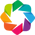

In [24]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook
output_notebook()
pd.set_option('display.max_columns', 100)

from holoviews.operation.datashader import datashade
import geoviews as gv
import cartopy.crs as ccrs
from colorcet import fire

gv.extension('bokeh')

In [27]:
# geometry needs to be labeled as geometry with geoviews
base_gdf_catch_proj = base_gdf_catch_proj.rename(columns={"geom_catchment":"geometry"})

In [28]:
base_gdf_catch_proj.columns

Index(['tploadrate_total', 'tploadate_conc', 'tnloadrate_total',
       'tnloadate_conc', 'tssloadrate_total', 'tssloadate_conc',
       'catchment_hectares', 'watershed_hectares', 'tploadrate_total_ws',
       'tnloadrate_total_ws', 'tssloadrate_total_ws', 'maflowv', 'geom',
       'geometry', 'cluster', 'fa_name', 'sub_focusarea', 'nord', 'nordstop',
       'huc12'],
      dtype='object')

In [106]:
# base_gdf_catch_proj = base_gdf_catch_proj.set_geometry("geom")

Below: doesn't use datashader - is very slow to render.

In [ ]:
polys = gv.Polygons(base_gdf_catch_proj, vdims=['maflowv'], crs=ccrs.PlateCarree())

plot = gv.tile_sources.CartoDark()\
    * polys.opts(color_index='maflowv', colorbar=True, tools=['hover'])
plot.opts(width=700, height=600, bgcolor='black')
#gv.save(plot, "./img/datashader/map_cologne1.html")

## Datashader

**spatialpandas**: datashader builds on spatialpandas to support vectorized polygon renderuing using numba. 

https://github.com/holoviz/spatialpandas/blob/master/examples/Overview.ipynb

Datashader requires plain arrays of coordinates (ragged arrays for lines/polygons) to efficiently visualize geometries. 
https://www.gitmemory.com/issue/holoviz/datashader/1006/859928820

Example: https://nbviewer.jupyter.org/gist/jorisvandenbossche/3e7ce14cb5118daa0f6097d686981c9f

In [36]:
# conda install -c pyviz spatialpandas
# conda install -c conda-forge pygeos
# conda install -c conda-forge geopandas=0.8.0 : https://githubmemory.com/repo/holoviz/spatialpandas/issues/58
import spatialpandas as spd
import spatialpandas.io
import pygeos
# ddf = spd.io.read_parquet_dask('./data/base_df.parquet')

In [43]:
arr_sp = spatialpandas.geometry.MultiPolygonArray.from_geopandas(base_gdf_catch_proj.geometry, orient=False)
arr_sp[0]

MultiPolygon([[[-74.92701645070821, 41.492391107411194, -74.92693682685527, 41.492652583760574, -74.92729000342061, 41.49271153353528, -74.92721038022165, 41.49297301013741, -74.92756355862464, 41.49303195917818, -74.9274839360797, 41.49329343603315, -74.92783711632035, 41.493352384339985, -74.9276778719467, 41.49387533857393, -74.92803105527086, 41.49393428638123, -74.92787181102169, 41.49445724115772, -74.92751862520575, 41.494398292881705, -74.92743900094753, 41.49465977006329, -74.92779218800935, 41.494718718573694, -74.92771256440518, 41.494980196008115, -74.92735937609748, 41.49492124726335, -74.92720012462179, 41.495444201718875, -74.92684693441413, 41.49538525153703, -74.92676730654259, 41.4956467285581, -74.92712049799617, 41.495705678974375, -74.92688161456805, 41.496490110851816, -74.92723481035131, 41.49654906100293, -74.92659777180064, 41.498640882032994, -74.92624456604952, 41.49858193000658, -74.92552784118263, 41.500935227975354, -74.92517462480902, 41.50087627287057, -

In [64]:
df_spd = spatialpandas.GeoDataFrame(base_gdf_catch.drop(['geom'], axis=1))

In [ ]:
df_spd = df_spd.rename(columns={'geom_catchment': 'geometry'})

In [80]:
df_spd = df_spd.set_geometry("geometry")

In [59]:
# df_spd['geometry'] = df_spd['geometry'].astype(np.float32)

In [76]:
df_spd.head()

tploadrate_total  tploadate_conc  tnloadrate_total  tnloadate_conc  \
comid                                                                         
4149942           19.8106          0.0199          461.7835          0.4635   
4151440            0.0037          0.0120            0.0679          0.2181   
4150082            2.0144          0.0099           25.4212          0.1405   
4151394            2.9297      -9999.0000           58.2131      -9999.0000   
4149944            0.2212          0.0199            1.7217          0.4623   

         tssloadrate_total  tssloadate_conc  catchment_hectares  \
comid                                                             
4149942         23315.2162          23.4000            199.4606   
4151440             6.6330          12.7636              0.0899   
4150082          4910.5669          22.9938             45.1439   
4151394          5942.7803       -9999.0000             11.8705   
4149944           714.6338          23.9081              1.3489   

         watershed_hectares  tploadrate_total_ws  tnloadrate_total_ws  \
comid                                                                   
4149942              199.62               0.0993               2.3135   
4151440             5049.90               0.0758               1.3784   
4150082               69.21               0.0490               0.6948   
4151394           697436.01          -54432.3165          -54432.3165   
4149944              200.97               0.0993               2.3064   

         tssloadrate_total_ws   maflowv  \
comid                                     
4149942              116.7978     1.115   
4151440               80.6635    35.714   
4150082              113.7074     0.383   
4151394           -54432.3165  4248.704   
4149944              119.2765     1.122   

                                                  geometry  \
comid                                                        
4149942  MultiPolygon([[[506092.1223481243, 4593422.060...   
4151440  MultiPolygon([[[514955.5722965664, 4587467.784...   
4150082  MultiPolygon([[[502581.68997010624, 4590660.52...   
4151394  MultiPolygon([[[507205.2378684826, 4591376.553...   
4149944  MultiPolygon([[[506092.1223481243, 4593422.060...   

                        cluster fa_name  sub_focusarea     nord  nordstop  \
comid                                                                       
4149942  Poconos and Kittatinny    None            NaN  72392.0   72392.0   
4151440  Poconos and Kittatinny    None            NaN  72128.0   72165.0   
4150082  Poconos and Kittatinny    None            NaN  72440.0   72441.0   
4151394  Poconos and Kittatinny    None            NaN  72338.0   74971.0   
4149944  Poconos and Kittatinny    None            NaN  72391.0   72392.0   

                huc12  
comid                  
4149942  020401040504  
4151440  020401040504  
4150082  020401040504  
4151394  020401040504  
4149944  020401040504

In [83]:

# try datashader on polygons:

cvs = ds.Canvas(plot_width=650, plot_height=400)
agg = cvs.polygons(df_spd, geometry='geometry', agg=ds.mean("maflowv"))
# ds.transfer_functions.shade(agg)

TypeError: Cannot interpret 'MultiPolygonDtype(float64)' as a data type

In [63]:
def get_flat_coords_offset_arrays(arr):
    """
    Version for MultiPolygon data
    """
    # explode/flatten the MultiPolygons
    arr_flat, part_indices = pygeos.get_parts(arr, return_index=True)
    # the offsets into the multipolygon parts
    offsets1 = np.insert(np.bincount(part_indices).cumsum(), 0, 0)

    # explode/flatten the Polygons into Rings
    arr_flat2, ring_indices = pygeos.geometry.get_rings(arr_flat, return_index=True)
    # the offsets into the exterior/interior rings of the multipolygon parts 
    offsets2 = np.insert(np.bincount(ring_indices).cumsum(), 0, 0)

    # the coords and offsets into the coordinates of the rings
    coords, indices = pygeos.get_coordinates(arr_flat2, return_index=True)
    offsets3 = np.insert(np.bincount(indices).cumsum(), 0, 0)
    
    return coords, offsets1, offsets2, offsets3

def spatialpandas_from_pygeos(arr):
    coords, offsets1, offsets2, offsets3 = get_flat_coords_offset_arrays(arr)
    coords_flat = coords.ravel()
    offsets3 *= 2
    
    # create a pyarrow array from this
    _parr3 = pa.ListArray.from_arrays(pa.array(offsets3), pa.array(coords_flat))
    _parr2 = pa.ListArray.from_arrays(pa.array(offsets2), _parr3)
    parr = pa.ListArray.from_arrays(pa.array(offsets1), _parr2)
    
    return spatialpandas.geometry.MultiPolygonArray(parr)

In [87]:
base_gdf_catch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19496 entries, 4149942 to 4150466
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tploadrate_total      19496 non-null  float64 
 1   tploadate_conc        19496 non-null  float64 
 2   tnloadrate_total      19496 non-null  float64 
 3   tnloadate_conc        19496 non-null  float64 
 4   tssloadrate_total     19496 non-null  float64 
 5   tssloadate_conc       19496 non-null  float64 
 6   catchment_hectares    19496 non-null  float64 
 7   watershed_hectares    19496 non-null  float64 
 8   tploadrate_total_ws   19496 non-null  float64 
 9   tnloadrate_total_ws   19496 non-null  float64 
 10  tssloadrate_total_ws  19496 non-null  float64 
 11  maflowv               19496 non-null  float64 
 12  geom                  19266 non-null  geometry
 13  geom_catchment        19496 non-null  geometry
 14  cluster               17358 non-null  

In [90]:
base_gdf_catch.geom_catchment.array.data

array([<shapely.geometry.multipolygon.MultiPolygon object at 0x0000022F77F1A6A0>,
       ...,
      dtype=object)

In [91]:
arr_sp2 = spatialpandas_from_pygeos(base_gdf_catch.geom_catchment.array.data)

TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

# Next steps
* Drop down menus - maybe (low priority)
* Add polylines to plotly map? 
* Flip on and off different features?

Questions:
* units? Got them
* Does Mike have info on larger geographic areas and their relaton to comids? Yes, done

Future next steps:
* Arithmetic on columns 
* Organized efforts into geographic **clusters** --> **focus areas**  --> **pour points** --> Done. 
* HUC12 (similar map)

**Units:** 
* Concentration: mg/L
* loadrate_totals: kg/yr
* loadrate_total_ws: attempt to get loadrate totals to kg/ha: fails if mean annual flow doesn't exist = ((loadate_conc * 28.3168 * 31557600 / 1000000) * maflowv) / watershed_hectares 